Name: <b>ABUBAKAR Ibrahim</b><br />
Matic no: <b>M.eng/SIPET/2022/13711</b>

### Assignment
<i>Prediction and analysis of hydraulic conductivity/Compressive strength of Lateritic soil - Bentonite mixtures using support vector machine</i>	
<hr />



importing the modules to be used

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

reading in the data

In [2]:
pd.read_excel("data/AI DATA ANALYSIS AND PREDICTION.xlsx")
ucs = pd.read_excel("data/UCS AI DATA.xlsx")
ucs.columns = ucs.loc[1]
ucs = ucs.drop([0,1], axis = 0).reset_index(drop = True)
ucs.head()

1,Compactive Effort E,Moulding Water Content (%),Bentonite content (%),UCS (kN/m2)
0,RBSL,12.5,0,191.47
1,RBSL,15,0,184.55
2,RBSL,17.5,0,241.67
3,RBSL,20,0,138.34
4,RBSL,22.5,0,117.37


In [3]:
print(ucs.shape)
ucs.info()

(100, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Compactive Effort E         100 non-null    object
 1   Moulding Water Content (%)  100 non-null    object
 2   Bentonite content (%)       100 non-null    object
 3   UCS (kN/m2)                 100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [4]:
ucs.columns

Index(['Compactive Effort E', 'Moulding Water Content (%)',
       'Bentonite content (%)', 'UCS (kN/m2)'],
      dtype='object', name=1)

In [5]:
ucs['Moulding Water Content (%)'] = ucs['Moulding Water Content (%)'].astype(float)
ucs['Bentonite content (%)'] = ucs['Bentonite content (%)'].astype(float)
ucs['UCS (kN/m2)'] = ucs['UCS (kN/m2)'].astype(float)

In [6]:
ucs.isnull().sum()

1
Compactive Effort E           0
Moulding Water Content (%)    0
Bentonite content (%)         0
UCS (kN/m2)                   0
dtype: int64

In [7]:
ucs['UCS (kN/m2)'].max()

1325.99

Text(0.5, 1.0, 'histogram plot of UCS')

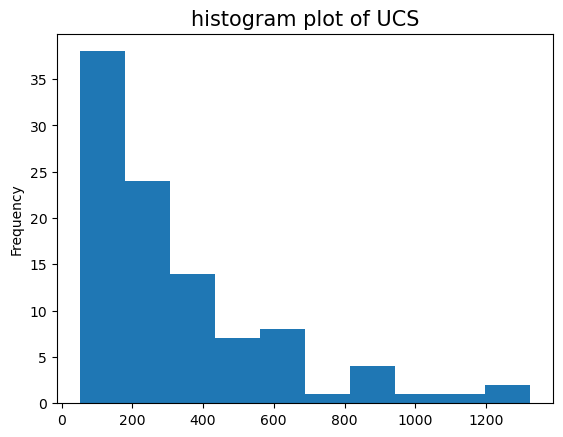

In [8]:
ucs['UCS (kN/m2)'].plot(kind = 'hist')
plt.title('histogram plot of UCS', fontsize = 15)

Text(0.5, 1.0, 'value counts of Bentonite content')

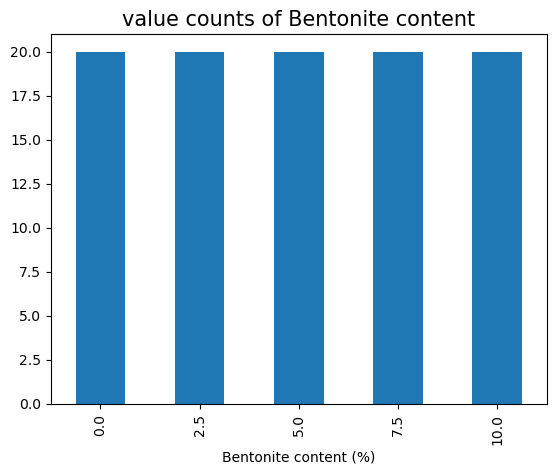

In [9]:
ucs['Bentonite content (%)'].value_counts().plot(kind = 'bar')
plt.title('value counts of Bentonite content', fontsize = 15)

Text(0.5, 1.0, 'value counts of Compactive effort')

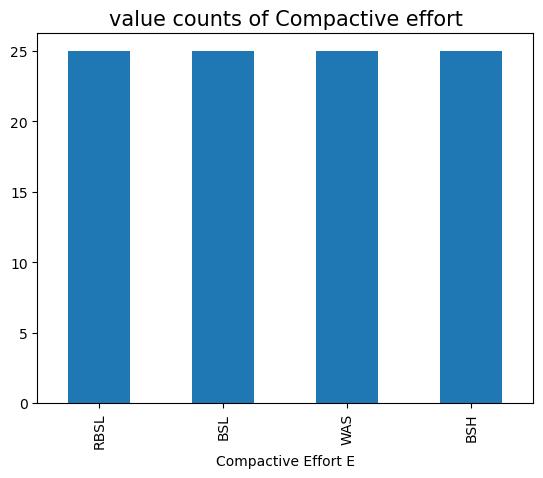

In [10]:
ucs['Compactive Effort E'].value_counts().plot(kind = 'bar')
plt.title('value counts of Compactive effort', fontsize = 15)

## Observations
<ul>
<li>the target class is the Unconfined Compressive Strength (m/s)</li>
<li>the target class is a float type number with most values between 0 and 200</li>
<li>there are 100 data points with four columns</li>
<li>there are no null value in the dataset</li>
<li>the datatype for all the columns are object which need to be converted to numeric data type</li>
<li>the comparative effort have four categories with 25 rows each</li>
<li>Bentonite content have values containing quarters of 1 (i.e. 0.25, 0.5, 0.75, and 1.0)</li>
</ul>

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


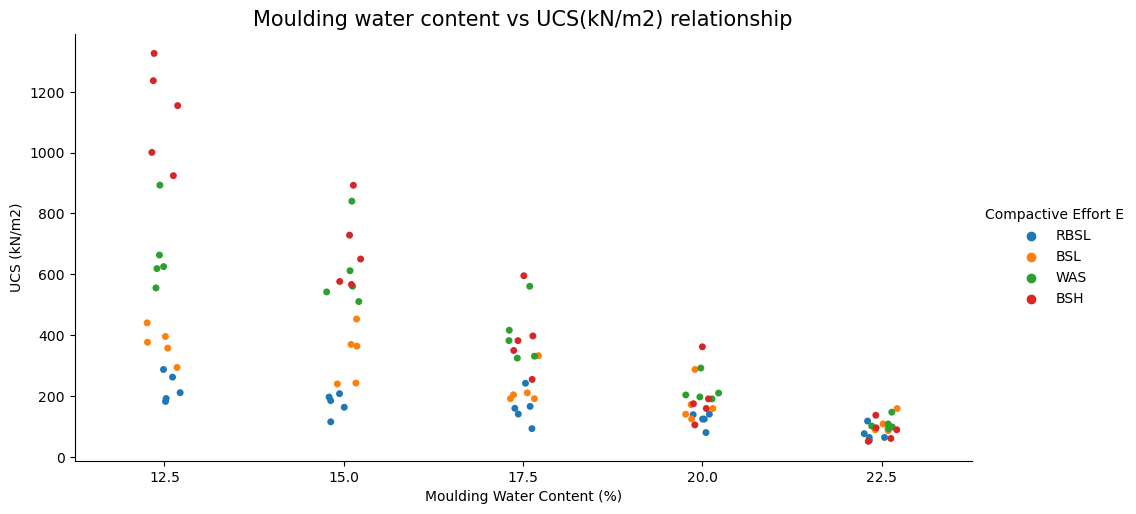

In [11]:
sns.catplot(x = 'Moulding Water Content (%)', y = 'UCS (kN/m2)', hue = 'Compactive Effort E', data = ucs, aspect = 2)
plt.xlabel('Moulding Water Content (%)')
plt.ylabel('UCS (kN/m2)')
plt.title('Moulding water content vs UCS(kN/m2) relationship', fontsize = 15)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


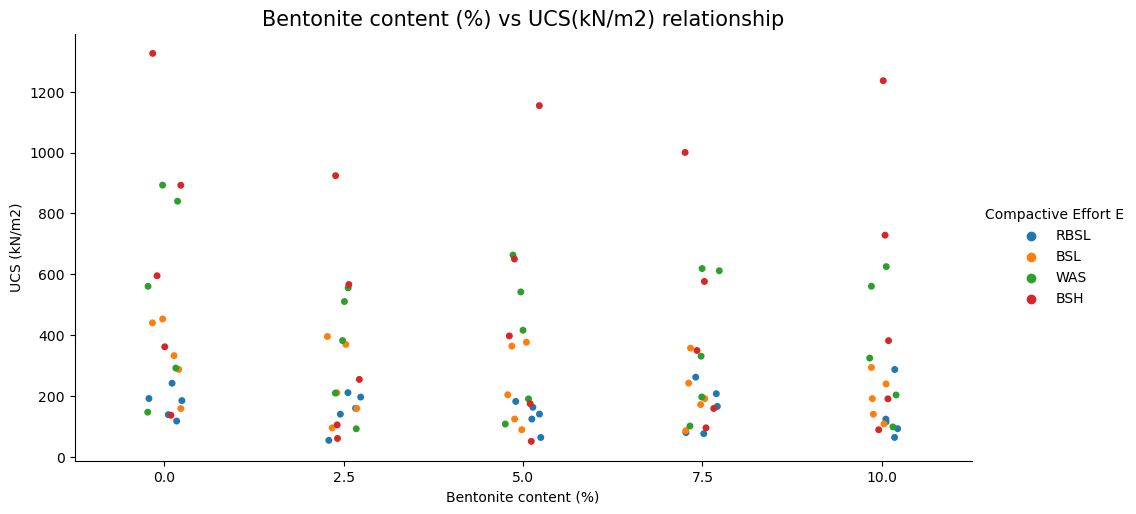

In [12]:
sns.catplot(x = 'Bentonite content (%)', y = 'UCS (kN/m2)', hue = 'Compactive Effort E', data = ucs, aspect = 2)
plt.xlabel('Bentonite content (%)')
plt.ylabel('UCS (kN/m2)')
plt.title('Bentonite content (%) vs UCS(kN/m2) relationship', fontsize = 15)
plt.show()

In [13]:
le = LabelEncoder()
ucs['Compactive Effort E'] = le.fit_transform(ucs['Compactive Effort E'])
for i, j in enumerate(le.classes_):
    print(f'{j} is encoded as {i}')

BSH is encoded as 0
BSL is encoded as 1
RBSL is encoded as 2
WAS is encoded as 3


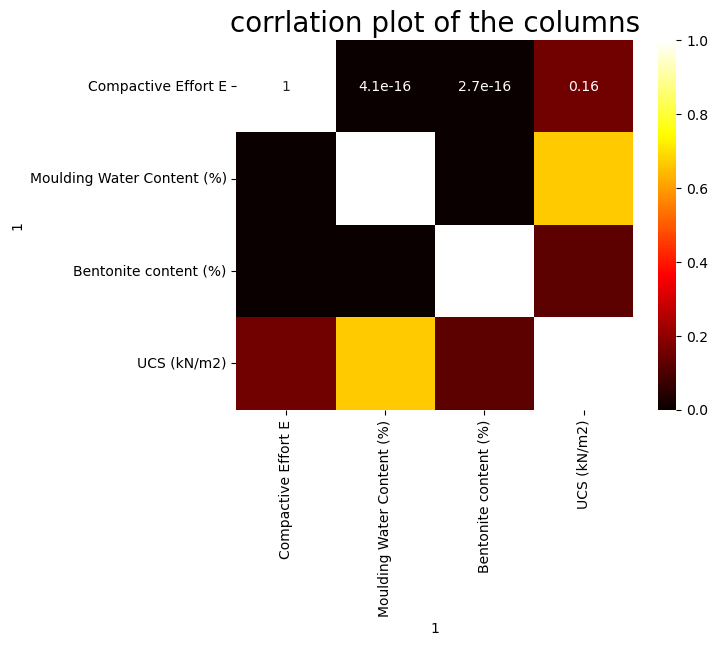

In [14]:
sns.heatmap(ucs.corr().abs(), cmap = 'hot', annot = True)
plt.title('corrlation plot of the columns', fontsize = 20)
plt.show()

In [15]:
y = ucs.pop('UCS (kN/m2)')
X = ucs

In [16]:
display(X.head(2))
print(y[:5])

1,Compactive Effort E,Moulding Water Content (%),Bentonite content (%)
0,2,12.5,0.0
1,2,15.0,0.0


0    191.47
1    184.55
2    241.67
3    138.34
4    117.37
Name: UCS (kN/m2), dtype: float64


splitting to 80% for training and 20% for testing while shuffling the data to ensure each class of compactive effort is distributed evenly

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

support vector regressor

In [18]:
model = SVR()

In [19]:
model.fit(X_train, y_train)

SVR()

In [20]:
prediction = model.predict(X_test)

In [21]:
np.sqrt(mean_squared_error(prediction, y_test))

336.0494792510121

In [22]:
prediction

array([201.543615  , 208.63071874, 203.70573768, 202.39393495,
       201.44947237, 196.92629469, 211.51355149, 195.20494493,
       203.63908243, 207.17188194, 195.95272776, 208.01933293,
       208.62080129, 211.7658616 , 199.33341996, 211.45584574,
       202.91808833, 198.49431038, 195.82845418, 211.51355365])

In [23]:
a = pd.DataFrame([prediction, y_test]).T
a.columns = ['prediction', 'actual value']
a['difference'] = a['actual value'] - a.prediction
a

,prediction,actual value,difference
0,201.543615,287.01,85.466385
1,208.630719,369.31,160.679281
2,203.705738,140.31,-63.395738
3,202.393935,324.35,121.956065
4,201.449472,291.68,90.230528
5,196.926295,91.96,-104.966295
6,211.513551,1154.33,942.816449
7,195.204945,75.90,-119.304945
8,203.639082,415.91,212.270918
9,207.171882,611.51,404.338118


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


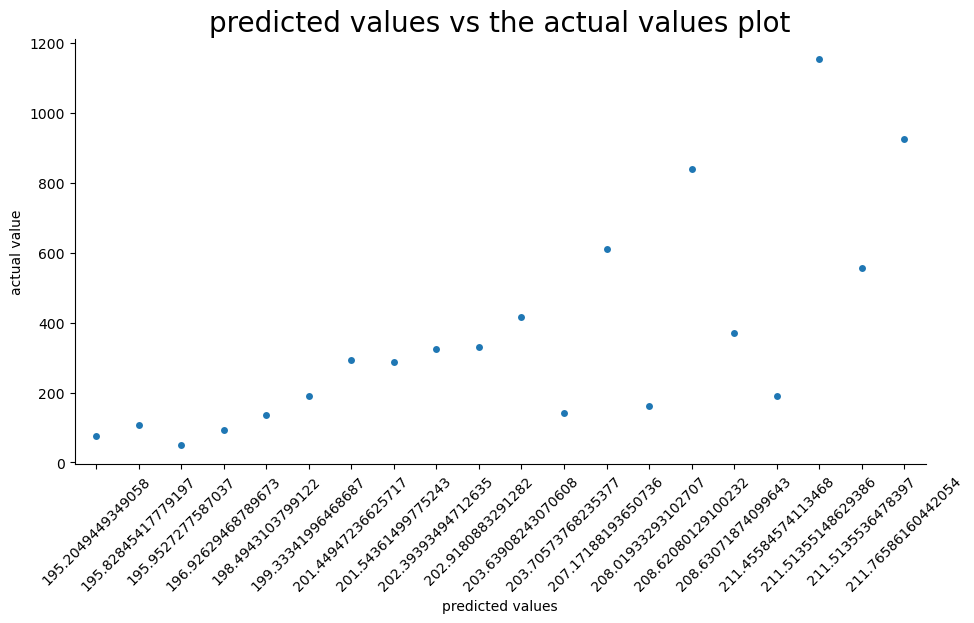

In [24]:
sns.catplot(x = 'prediction', y = "actual value", data = a, aspect =2)
plt.title('predicted values vs the actual values plot', fontsize = 20)
plt.xlabel('predicted values')
plt.ylabel('actual value')
plt.xticks(rotation = 45)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


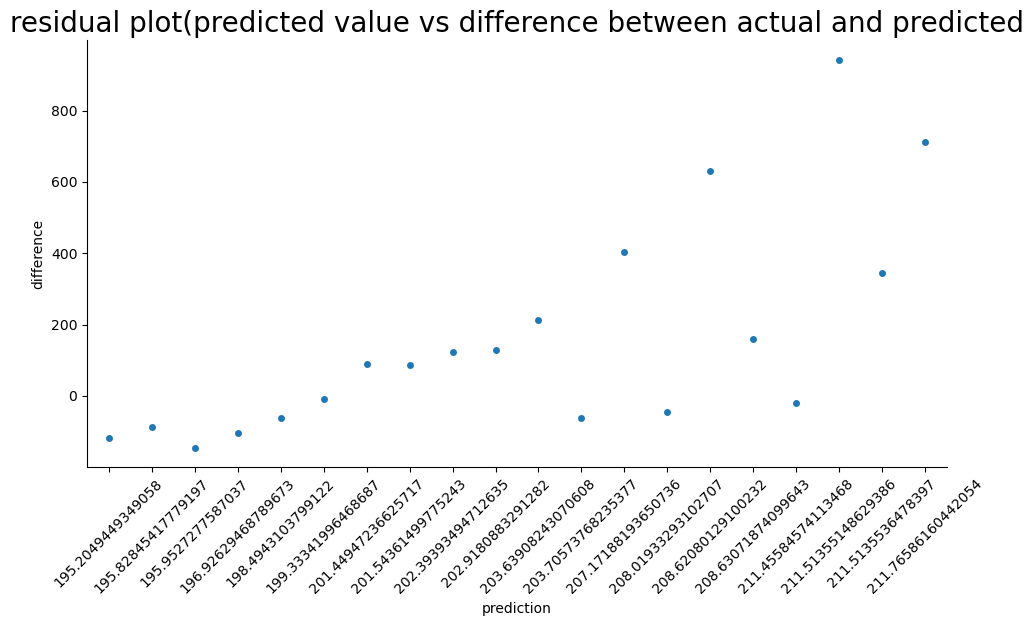

In [25]:
sns.catplot(x = 'prediction', y = "difference", data = a, aspect =2)
plt.xticks(rotation = 45)
plt.title('residual plot(predicted value vs difference between actual and predicted', fontsize = 20)
plt.show()

###### Conclusion
This study investigated the feasibility of using a Support Vector Machine (SVM) for predicting the Unconfined Compressive Strength (UCS) of Lateritic soil-Bentonite mixtures. The analysis revealed several key observations:
<ol>
<li>The target variable, UCS, is a continuous value ranging from 0 to 1400 (m/MPa), with most observations concentrated between 0 and 200 (m/MPa). This indicates a regression problem suitable for SVM application.</li>
<li>The dataset comprised 100 data points with four features, all initially in object format, requiring conversion to numerical data types for model training.</li>
<li>Interestingly, the "compactive effort" feature had four distinct categories with an equal number of data points in each, suggesting a potential influence on UCS.</li>
<li>Bentonite content exhibited a specific range with values representing quarters of 1 (0.25, 0.5, 0.75, and 1.0). This potentially allows for exploring the impact of varying Bentonite content on UCS.</li>
<li>While the model achieved a Root Mean Squared Error (RMSE) of 336, further optimization might be necessary to improve prediction accuracy, especially for values exceeding 200 (m/MPa).</li>
<li>The residual plot indicated a potential trend, suggesting a systematic error that could be addressed through model refinement or data transformation techniques.</li>
<li>The correlation coefficients between features and the target variable were generally low (around 20%). This suggests that non-linear relationships might exist between the features and UCS, potentially justifying the use of a non-linear model like SVM.y justifying the use of a non-linear model like SVM.</li>
<li>Moulding water content shows a high correlation with the hydraulic conductivity.</li>
</ol>